<a href="https://colab.research.google.com/github/jomo101/QCB23/blob/main/QCBC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install qiskit ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 19.6 MB/s eta 0:00:00


In [67]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
from qiskit.visualization import array_to_latex

state = qi.Statevector([0,1,0,0])
state.draw('latex')

<IPython.core.display.Latex object>

In [68]:
from qiskit.quantum_info import Operator
circuit = QuantumCircuit(2) #number of qubits is argument
circuit.cx(0,1) #argument in cx(control line, which cubit its acting on), ccx has 2 control lines...

print(Operator(circuit)) #CNOT gate

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [13]:
print(Operator(circuit.reverse_bits())) # block of an identity matrix and a pauli x matrix

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [69]:
from qiskit.visualization import *
from qiskit.quantum_info import *

In [35]:
# define quantum circuit, wtih classical and quantum bits
qc = QuantumCircuit(2,2)
qc.h(0) #hadamar gate (superposition) to first cubit
qc.cx(0,1)
qc.measure(1,1)
qc.measure(0,0)
qc.draw()
#2/ is 2 wires
# H gate on first, cx on second, then measure the cubits

┌───┐        ┌─┐
q_0: ┤ H ├──■─────┤M├
     └───┘┌─┴─┐┌─┐└╥┘
q_1: ─────┤ X ├┤M├─╫─
          └───┘└╥┘ ║ 
c: 2/═══════════╩══╩═
                1  0

In [65]:
from qiskit import *
# one way  of getting a bell state (1/2) result, H on 0, then CNOT to 0,1
# results give about half
counts = execute(qc, Aer.get_backend('qasm_simulator'),shots=2**10) #2^10 measurements
print(counts.result().get_counts())

QiskitError: ignored

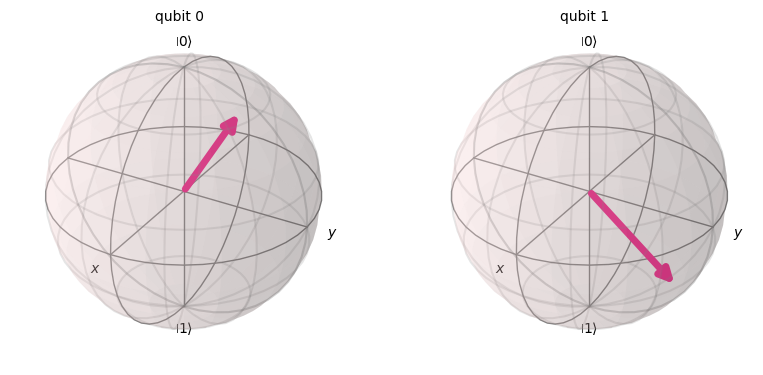

In [43]:
from qiskit.visualization import plot_bloch_multivector
rand_sv = random_statevector(4).data
plot_bloch_multivector(rand_sv)

In [81]:
# CSWAP
# |101> -> |101>, |011> -> |101>

# qc.x(0),qc.h(2)
# draw
# qc.cswap(0,1,2)
#
qc = qi.Statevector([0,0,0,0,0,1,0,0])
qc.draw('latex')
qc.x(0)
qc.h(2)
qc.draw('latex')

AttributeError: ignored

In [82]:
# FIDELITY OF TWO STATES
# implementing qft
qc1 = QuantumCircuit(3)
qc1.ry(1.91063,0)
qc1.ch(0,1) #controlled hadamar
qc1.cx(0,2) # CNOT
qc1.cx(0,1) #CNOT
qc1.x(0) #X gate
st = Statevector.from_instruction(qc1)
st.draw('latex')

<IPython.core.display.Latex object>

In [83]:
qc2 = QuantumCircuit(3)
qc2.h(0)
qc2.cx(0,1)
qc2.cx(1,2)
st = Statevector.from_instruction(qc2)
st.draw('latex')

<IPython.core.display.Latex object>

In [84]:
backend = Aer.get_backend('statevector_simulator')
sv1 = execute(qc1,backend).result().get_statevector(qc1)
sv2 = execute(qc2,backend).result().get_statevector(qc2)
print('F',state_fidelity(sv1,sv2))


F 0.0


In [85]:
# Quantum Fourier Transform
# Cost is n^2
# does QFT change entalgement
# QFT affects rotation angle
# hadamar, P(pi/2), P(pi/4), P(pi/8) on first
# H, pi/2, pi/4 on second
# H, P(pi/2)
# H
# needs swapping gates, n/2
# impkement QFT

In [92]:
import math
qc = QuantumCircuit(4)
st = Statevector.from_instruction(qc3)
st.draw('latex')
# compute dnesity matrix on 3 cubits

<IPython.core.display.Latex object>

In [114]:
# cp is controlled rotation, phase gate
qc.h(0)
qc.cp(math.pi/2,1,0)
qc.cp(math.pi/4,2,0)
qc.cp(math.pi/8,3,0)
qc.h(1)
qc.cp(math.pi/2,2,1)
qc.cp(math.pi/4,3,1)
qc.h(2)
qc.cp(math.pi/2,3,2)
qc.h(3)
st = Statevector.from_instruction(qc)
st.draw('latex')

<IPython.core.display.Latex object>

In [104]:
qc.draw()

┌───┐                  ┌───┐           »
q_0: ──────■────────■────────■─────────┤ H ├────────■─────────┤ H ├───■───────»
     ┌───┐ │        │        │P(π/2)   └───┘  ┌───┐ │P(π/2)   └───┘   │       »
q_1: ┤ H ├─┼────────┼────────■────────■───────┤ H ├─■────────■────────┼───────»
     ├───┤ │        │P(π/4)           │P(π/2) ├───┤          │        │P(π/4) »
q_2: ┤ H ├─┼────────■─────────────────■───────┤ H ├──────────┼────────■───────»
     ├───┤ │P(π/8)                            └───┘          │P(π/4)          »
q_3: ┤ H ├─■─────────────────────────────────────────────────■────────────────»
     └───┘                                                                    »
«                     ┌───┐                    ┌───┐                    ┌───┐  »
«q_0: ──────■─────────┤ H ├────────────■───────┤ H ├─■────────■─────────┤ H ├──»
«     ┌───┐ │P(π/2)   └───┘    ┌───┐   │P(π/2) ├───┤ │        │P(π/2)   └───┘  »
«q_1: ┤ H ├─■────────■─────────┤ H ├───■───────┤ H ├─┼────────■────────■───────»
«     └───┘          │P(π/2)   └───┘    ┌───┐  └───┘ │P(π/4)           │P(π/2) »
«q_2: ───────────────■────────■─────────┤ H ├────────■─────────────────■───────»
«                             │P(π/2)   └───┘                                  »
«q_3: ────────────────────────■────────────────────────────────────────────────»
«                                                                              »
«                   ┌───┐┌───┐┌───┐                                         »
«q_0: ──────■───────┤ H ├┤ H ├┤ H ├─■────────■─────────────■────────────────»
«     ┌───┐ │P(π/2) └───┘└───┘└───┘ │P(π/2)  │       ┌───┐ │                »
«q_1: ┤ H ├─■───────────────────────■────────┼───────┤ H ├─┼────────■───────»
«     └───┘                                  │P(π/4) └───┘ │        │P(π/2) »
«q_2: ───────────────────────────────────────■─────────────┼────────■───────»
«                                                          │P(π/8)          »
«q_3: ─────────────────────────────────────────────────────■────────────────»
«                                                                           »
«                                 
«q_0: ────────────────────────────
«                                 
«q_1: ─■──────────────────────────
«      │       ┌───┐              
«q_2: ─┼───────┤ H ├─■────────────
«      │P(π/4) └───┘ │P(π/2) ┌───┐
«q_3: ─■─────────────■───────┤ H ├
«                            └───┘

In [105]:
def qft_rotations(circuit,n):
  if n == 0:
    return circuit
  n -= 1
  circuit.h(n)
  for qubit in range(n):
    circuit.cp(math.pi/2**(n-qubit),qubit,n)
    qft_rotations(circuit,n)

In [112]:
qubits = 4
qc = QuantumCircuit(qubits)
qft_rotations(qc,qubits)
#qc.draw()
st = Statevector.from_instruction(qc)
st.draw('latex')

<IPython.core.display.Latex object>

In [115]:
## Qubit Hamiltomnian, Anharmonic Oscillator
from qiskit.opflow import X,Y,Z,I #pauli matrices
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms.optimizers import COBYLA, SLSQP

In [119]:
g = 0.02
Hps = 4*I^I^I


4.0 * III
